In [117]:
#General Imports
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
#Imports for Splitting Data
from sklearn.model_selection import train_test_split
#Import for data Preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures
#Import for Linear Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import GradientBoostingRegressor
#Import for Clasification Models
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import GaussianNB
#Imports for Accuracy check
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report

In [118]:
#########################QUESTION 1 -  Read the dataset given in file named 'bigcity.csv'

In [119]:
df = pd.read_csv('bigcity.csv')

In [120]:
#Removing the Unwanted Column
del(df['Unnamed: 0'])

In [121]:
#########################Question 2 - Transforming the Dataset ################

In [122]:
#Assigning to X and Reshaping
X = df[['u']]

In [123]:
#Assigning to Y and Reshaping 
Y = df[['x']]

In [124]:
X.shape


(49, 1)

In [125]:
Y.shape

(49, 1)

In [126]:
########################Question3 - Checking for Missing Values ###############

In [127]:
#Checking for Null Values
df.isnull().sum()

u    0
x    0
dtype: int64

In [128]:
#Checking for Type Compatibility
df.dtypes

u    int64
x    int64
dtype: object

In [129]:
#checking if data is not corrupted such as a "?" instead of a number
df[~df.applymap(np.isreal).all(1)]

,u,x


In [130]:
################## I HAVE WRITTEN A HELPER FUNCTION WHICH COVER REST OF ALL QUESTIONS ########################

In [131]:
def Use_LinearRegression(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False, poly_degree=0, plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
    
    #Just to mention ..Anyhow Standardization wont Improve the Accuracty of Linear Regression.
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
         
        
    linear_model = LinearRegression(normalize = True)
    print(linear_model)
    linear_model.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    print("___________________________________________________")
    print("Coefficent : {0}\n".format(linear_model.coef_[0]))
    print("Intercept  : {0}\n".format(linear_model.intercept_))
    print("___________________________________________________\n")
    print("Training Accuracy : {0}\n".format(linear_model.score(x_train,y_train)))
    print("Testing Accuracy R2 : {0}\n".format(r2_score(y_test,y_pred)))
    print("Testing MeanSquareError :{0}\n".format(mean_squared_error(y_test, y_pred)))
    print("Testing Accuracy R2 : {0}\n".format(r2_score(y_test,y_pred)))
    print("___________________________________________________\n")
    if (plot == True):
        plt.figure(figsize=(20,10))
        print("Plotting Training and Testing Accuracy(How Closely Testing Curve follows Training Curve)\n")
        plt.plot(y_test.values, label='Training')
        plt.plot(y_pred, label="Testing")
        plt.legend()
        

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
___________________________________________________
Coefficent : 1.1594512342174783

Intercept  : 9.71845532282822

___________________________________________________

Training Accuracy : 0.9682175540860046

Testing Accuracy R2 : 0.918192256039698

Testing MeanSquareError :546.8692249032662

Testing Accuracy R2 : 0.918192256039698

___________________________________________________

Plotting Training and Testing Accuracy(How Closely Testing Curve follows Training Curve)



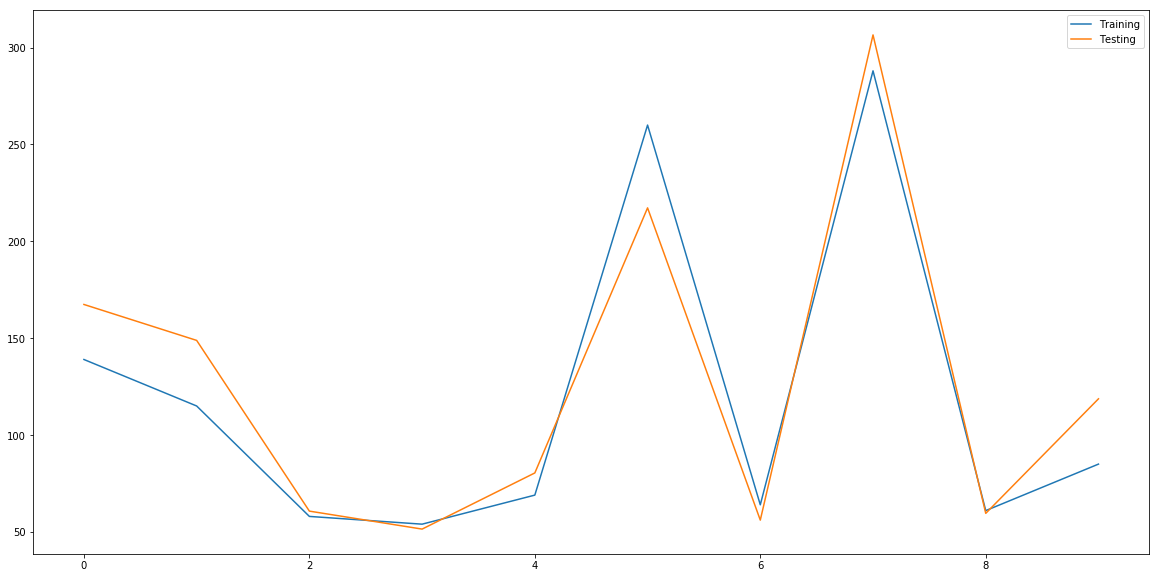

In [132]:
#poly_degree is the polynomial degree
Use_LinearRegression(df, ['u'],'x',t_size=0.2,r_state=1,poly_degree=0, plot=True)

In [133]:
#################THE HELPER FUNCTION DOES EVERYTHING ...BUT STILL ANSWERING QUSTIONS INDIVIDUALLY ###################

In [134]:
#####################################################################################################################

In [135]:
#############Question 4 - Splitting the Data in to Train and Test

In [136]:
x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

In [137]:
#############Question 5 - Find the Coefficent of Intercept

In [138]:
linear_model = LinearRegression(normalize = True)

In [139]:
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [140]:
y_pred = linear_model.predict(x_test)

In [141]:
print("Coefficent : {0}\n".format(linear_model.coef_[0]))
print("Intercept  : {0}\n".format(linear_model.intercept_))

Coefficent : [1.15945123]

Intercept  : [9.71845532]



In [142]:
#Question 6 - Plot the Linear Relation Ship Between Features and Target (y = mx + c)

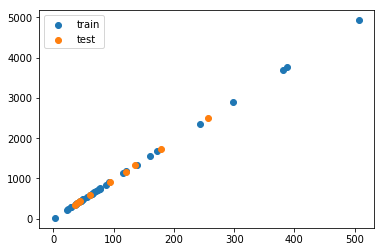

In [143]:
b0 = linear_model.coef_[0]
b1 = linear_model.intercept_
graph_ytrain = b0 + (b1*x_train)
graph_ytest = b0 + (b1 * x_test)
plt.scatter(x_train, graph_ytrain, label='train')
plt.scatter(x_test, graph_ytest, label='test')
plt.legend()

In [144]:
#Question 7 - Evaluating Model with SikitLearn

In [145]:
print("___________________________________________________")
print("Coefficent : {0}\n".format(linear_model.coef_[0]))
print("Intercept  : {0}\n".format(linear_model.intercept_))
print("___________________________________________________\n")
print("Training Accuracy : {0}\n".format(linear_model.score(x_train,y_train)))
print("Testing Accuracy R2 : {0}\n".format(r2_score(y_test,y_pred)))
print("Testing MeanSquareError :{0}\n".format(mean_squared_error(y_test, y_pred)))
print("___________________________________________________\n")

___________________________________________________
Coefficent : [1.15945123]

Intercept  : [9.71845532]

___________________________________________________

Training Accuracy : 0.9682175540860046

Testing Accuracy R2 : 0.918192256039698

Testing MeanSquareError :546.8692249032662

___________________________________________________



In [146]:
#########################################################################################################################

In [147]:
##################################SUPERVISED LEARNING - BUILDING A STUDENT PERFORMANCE PREDICTION SYSTEM################

In [148]:
##########Reading CSV

In [149]:
df = pd.read_csv('students_data.csv', delimiter=';')

In [150]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [151]:
#Checking for NULL VALUES

In [152]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [153]:
#Checking for dtypes

In [154]:
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [155]:
#Question 3 - Drop Missing Values 

In [156]:
df.dropna(inplace=True)

In [157]:
#Question 4 - Transform Data -  Print all Non Numberical attributes

In [158]:
df.select_dtypes(include='object')[0:10]

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no
9,GP,M,U,GT3,T,other,other,home,mother,no,yes,yes,yes,yes,yes,yes,no


In [159]:
#Question 5 - Drop Variables with Less Variance 

In [160]:
df.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [161]:
df_cols = df.select_dtypes(exclude = ['object'])
drop_col_cnt = 1
for column in df_cols:
    if(df_cols[column].var() < 1):
        drop_col_cnt = drop_col_cnt + 1
        df.drop(column, 1, inplace = True)


In [162]:
df.var()

age          1.628285
Medu         1.198445
Fedu         1.184180
goout        1.239388
Walc         1.658678
health       1.932944
absences    64.049541
G1          11.017053
G2          14.148917
G3          20.989616
dtype: float64

In [163]:
df.shape

(395, 27)

In [164]:
#Question 6 - ENCODING ALL CATEGORICAL DATA####################

In [165]:
l_col = df.select_dtypes(include='object').columns
label_encode = LabelEncoder()
for col in l_col:
    df[col] = label_encode.fit_transform(df[col])

In [166]:
df.head(20)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10
5,0,1,16,1,1,1,4,3,3,2,...,1,1,0,2,2,5,10,15,15,15
6,0,1,16,1,1,1,2,2,2,2,...,1,1,0,4,1,3,0,12,12,11
7,0,0,17,1,0,0,4,4,2,4,...,1,0,0,4,1,1,6,6,5,6
8,0,1,15,1,1,0,3,2,3,2,...,1,1,0,2,1,1,0,16,18,19
9,0,1,15,1,0,1,3,4,2,2,...,1,1,0,1,1,5,0,14,15,15


In [167]:
#Question 7 Convert all Continious Values of Grades

In [168]:
df['G1'] = df['G1'].apply(lambda x :1 if(x >=10) else 0)

In [169]:
df['G2'] = df['G2'].apply(lambda x :1 if(x >=10) else 0)

In [170]:
df['G3'] = df['G3'].apply(lambda x :1 if(x >=10) else 0)

In [171]:
##########################HELPER FUNCTION FOR LOGISTIC REGRESSION ###############################################

In [172]:
def Use_LogisticRegression(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False, log_penality='l2',log_iter=100, reg=1.0,poly_degree=0, plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
        
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    linear_model = LogisticRegression(penalty=log_penality, C=reg, solver='liblinear', max_iter=log_iter)
    print(linear_model)
    linear_model.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Accuracy Score  : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    #Uncomment to print the probabilities 
    #print((linear_model.predict_proba(x_test)))
    if(plot == True):
        print("y_test(Red) and y_pred(Green) --- Distributions \n")
        sns.distplot(y_test, kde=True, rug=True, color='red')
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        
        
        

In [173]:
def Use_KNeighborsClassifier(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,poly_degree=0, knn_neigh=5,plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
        
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    linear_model = KNeighborsClassifier(n_neighbors=knn_neigh)
    print(linear_model)
    linear_model.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Accuracy Score  : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    #Uncomment to print the probabilities 
    #print((linear_model.predict_proba(x_test)))
    if(plot == True):
        print("y_test(Red) and y_pred(Green) --- Distributions \n")
        sns.distplot(y_test, kde=True, rug=True, color='red')
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        
        
        

In [174]:
def Use_NaiveBayes(dataset,input_cols, output_col,t_size=0.2, r_state=10, s_scaler=False,poly_degree=0,naive_priors=None,plot=False):
    #If Input_cols = 0 then take all Colums except Output Column
    if(input_cols == 0):
        X = df.drop(output_col, axis=1)
    else:
        X = df[input_cols]
    Y = df[output_col]
    #Splitting the Data In to Testing and Training
    x_train, x_test, y_train,y_test = train_test_split(X, Y, test_size = t_size, random_state=r_state)
        
    if(s_scaler == True):
        sc = StandardScaler()
        x_train_scale = sc.fit_transform(x_train.astype(float))
        x_test_scale = sc.transform(x_test.astype(float))
        x_train = x_train_scale
        x_test = x_test_scale
    
    if(poly_degree):
        poly = PolynomialFeatures(poly_degree)
        x_train_poly = poly.fit_transform(x_train)
        x_test_poly = poly.transform(x_test)
        x_train = x_train_poly
        x_test = x_test_poly
           
    #C is the regularization Coefficeint (Smaller Value Stronger Reqularization)
    linear_model = GaussianNB(priors=naive_priors)
    print(linear_model)
    linear_model.fit(x_train, y_train)
    y_pred = linear_model.predict(x_test)
    print("___________________________________________________\n")
    print("Confustion Matrix for y_test and y_pred :\t")
    print("TN  FP")
    print("FN  TP\n")
    print(confusion_matrix(y_test, y_pred))
    #print(pd.crosstab(y_test, y_pred))
    print("\n")
    print("Accuray = (TP+TN)/(TP + TN + FP + FN)\n")
    print("Precission = TP/(TP + FP)\n")
    print("Recall = TP/(TP + FN)\n")
    print("\n")
    print("Accuracy Score  : {0}\n".format(accuracy_score(y_test, y_pred)))
    print("Precision Score : {0}\n".format(precision_score(y_test,y_pred)))
    print("Recall Score    : {0}\n".format(recall_score(y_test,y_pred)))
    print("F1 Score        : {0}\n".format(f1_score(y_test,y_pred)))
    print("___________________________________________________\n")
    #Uncomment to print the probabilities 
    #print((linear_model.predict_proba(x_test)))
    if(plot == True):
        print("y_test(Red) and y_pred(Green) --- Distributions \n")
        sns.distplot(y_test, kde=True, rug=True, color='red')
        sns.distplot(y_pred, kde=True, rug=True, color = 'green')
        
        
        

In [175]:
##################################END OF HELPER FUNCTIONS ####################################################

In [176]:
####################################QUESTION 8 --- APPLY THE MODELS################################################

In [177]:
#############APPLYING LOGISTIC REGRESSION 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[20  4]
 [ 4 51]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Accuracy Score  : 0.8987341772151899

Precision Score : 0.9272727272727272

Recall Score    : 0.9272727272727272

F1 Score        : 0.9272727272727272

___________________________________________________

y_test(Red) and y_pred(Green) --- Distributions 



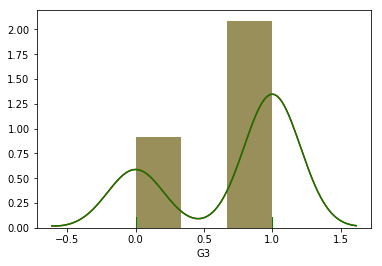

In [178]:
Use_LogisticRegression(df, 0, 'G3', t_size=0.2, r_state=1,plot=True)

In [179]:
#In the Above Graph Both Red and Gree Distribution overlapped So we Cant See the Red Color :)

In [180]:
#############APPLYING NAIVE BAYES

GaussianNB(priors=None, var_smoothing=1e-09)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[21  3]
 [ 6 49]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Accuracy Score  : 0.8860759493670886

Precision Score : 0.9423076923076923

Recall Score    : 0.8909090909090909

F1 Score        : 0.9158878504672897

___________________________________________________

y_test(Red) and y_pred(Green) --- Distributions 



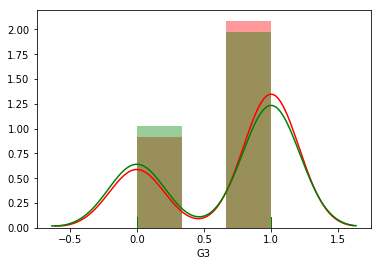

In [181]:
Use_NaiveBayes(df, 0, 'G3', t_size=0.2, r_state=1,plot=True)

In [182]:
#############APPLYING KNN

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[10 14]
 [ 7 48]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Accuracy Score  : 0.7341772151898734

Precision Score : 0.7741935483870968

Recall Score    : 0.8727272727272727

F1 Score        : 0.8205128205128205

___________________________________________________

y_test(Red) and y_pred(Green) --- Distributions 



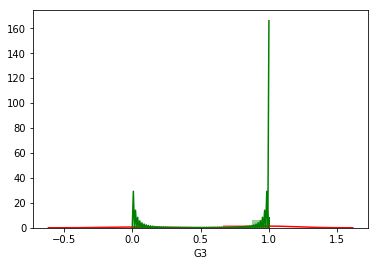

In [183]:
Use_KNeighborsClassifier(df, 0, 'G3', t_size=0.2, r_state=1,knn_neigh=5,plot=True)

In [184]:
############QUESTION 9 - PLOT G2 and G3 Variables

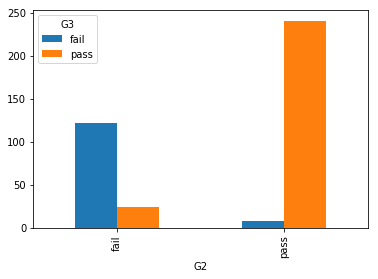

In [185]:
pd.crosstab(df['G2'].apply(lambda x:'pass' if(x==1) else 'fail') , df['G3'].apply(lambda x:'pass' if(x==1) else 'fail')).plot.bar()

In [186]:
##########QUESTION 10 - #######################################################

In [187]:
#No of Student is School 1

In [188]:
df.loc[df['school'] == 1,].shape[0]

46

In [189]:
#No of Students in School 2

In [190]:
df.loc[df['school'] == 0,].shape[0]

349

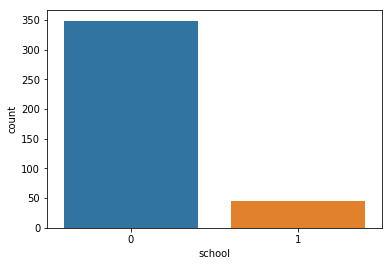

In [191]:
sns.countplot(df['school'])

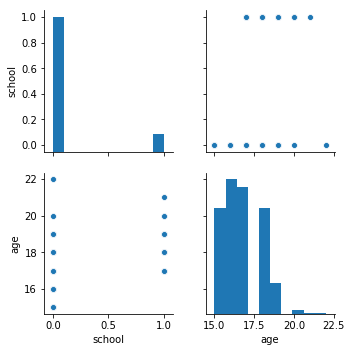

In [192]:
sns.pairplot(df[['school','age']])

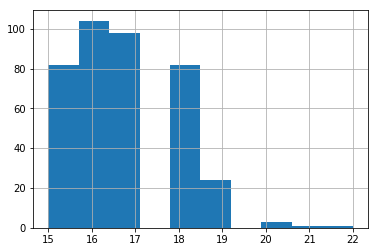

In [193]:
df['age'].hist()

In [194]:
###############################QUESTION 11##############################################################

In [195]:
X = df.drop('G3', axis=1)
Y = df['G3']

num_train = round(300/len(X)*100) ## 300 records out of len(X) records
# Set the number of testing points
num_test = 100 - num_train ##
num_train  = num_train/100

In [198]:
x_train, x_test, y_train,y_test = train_test_split(X, Y, train_size = 0.76, random_state=1)

In [199]:
x_train.shape

(300, 26)

In [200]:
y_train.shape

(300,)

In [201]:
#SO WE CAN PASS train_size = 0.76 or test_size = 0.24 (95/395)

In [202]:
#TESTING MODELS WITH THE 300 - 95 SPLIT 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[25  3]
 [ 6 61]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Accuracy Score  : 0.9052631578947369

Precision Score : 0.953125

Recall Score    : 0.9104477611940298

F1 Score        : 0.931297709923664

___________________________________________________

y_test(Red) and y_pred(Green) --- Distributions 



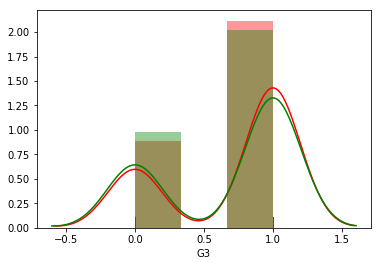

In [203]:
Use_LogisticRegression(df, 0, 'G3', t_size=(95/395), r_state=1,plot=True)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[12 16]
 [ 9 58]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Accuracy Score  : 0.7368421052631579

Precision Score : 0.7837837837837838

Recall Score    : 0.8656716417910447

F1 Score        : 0.8226950354609929

___________________________________________________

y_test(Red) and y_pred(Green) --- Distributions 



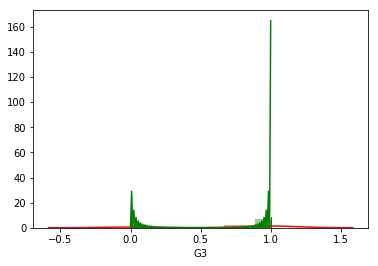

In [204]:
Use_KNeighborsClassifier(df, 0, 'G3', t_size=(95/395), r_state=1,knn_neigh=5,plot=True)

GaussianNB(priors=None, var_smoothing=1e-09)
___________________________________________________

Confustion Matrix for y_test and y_pred :	
TN  FP
FN  TP

[[25  3]
 [ 8 59]]


Accuray = (TP+TN)/(TP + TN + FP + FN)

Precission = TP/(TP + FP)

Recall = TP/(TP + FN)



Accuracy Score  : 0.8842105263157894

Precision Score : 0.9516129032258065

Recall Score    : 0.8805970149253731

F1 Score        : 0.9147286821705426

___________________________________________________

y_test(Red) and y_pred(Green) --- Distributions 



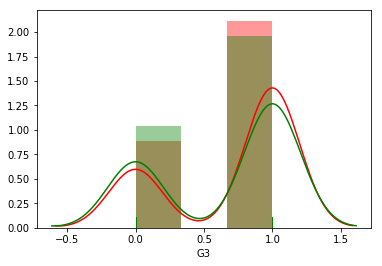

In [205]:
Use_NaiveBayes(df, 0, 'G3', t_size=(95/395), r_state=1,plot=True)